In [58]:
import os
import numpy as np
from astropy.io import fits
import pylab as pl
from scipy.interpolate import interp1d
import mytools
%matplotlib notebook

In [2]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


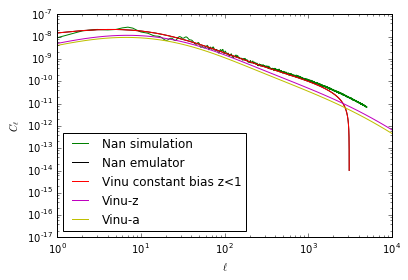

In [6]:
f = np.genfromtxt('/media/luna1/vinu/github/HaloModel/data/new_kappa_srd.dat')
l = f[:,0]
cl = f[:,1] * 8
pl.loglog(l, cl, c='g', label='Nan simulation')

f = np.genfromtxt('/media/luna1/vinu/github/HaloModel/data/psd_emulator.dat')
l = f[:,0]
cl = f[:,1]
pl.loglog(l, cl, c='k', label='Nan emulator')

f = np.genfromtxt('/media/luna1/vinu/github/HaloModel/data/psd_emulator.dat')
l = f[:,0]
cl = f[:,1]
pl.loglog(l, cl, c='r', label='Vinu constant bias z<1')


f = np.genfromtxt('/media/luna1/vinu/github/HaloModel/data/cl_kk_z.dat')
l = f[:,0]
cl = f[:,3]
pl.loglog(l, cl, c='m', label='Vinu-z')

f = np.genfromtxt('/media/luna1/vinu/github/HaloModel/data/cl_kk.dat')
#f = np.genfromtxt('../data/cl_kk.dat')
l = f[:,0]
cl = f[:,3]
pl.loglog(l, cl, c='y', label='Vinu-a')

pl.xlabel(r'$\ell$')
pl.ylabel(r'$C_\ell$')
pl.legend(loc=0)


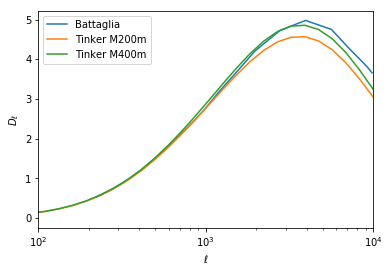

In [13]:
sf = fits.open('/media/luna1/flender/projects/gasmod/maps/OuterRim/cl_tsz150_Battaglia_c05_R13.fits')[1].data
l = np.arange(10000)
#pl.semilogx(l, l*(l+1)*sf['TEMPERATURE'][1:]/2./np.pi, label='Simulation')
b = np.genfromtxt('/media/luna1/vinu/github/HaloModel/data/battaglia_analytical.csv', delimiter=',')
pl.semilogx(b[:,0], b[:,1], label='Battaglia')
v2 = np.genfromtxt('/media/luna1/vinu/github/HaloModel/data/cl_yy_virial_mf_200m.dat')
D2 =  v2[:,0]*(1.+v2[:,0])*v2[:,1]*1e12*6.7354/2./np.pi
pl.semilogx(v2[:,0], D2, label='Tinker M200m')
v4 = np.genfromtxt('/media/luna1/vinu/github/HaloModel/data/cl_yy_virial_mf_400m.dat')
D4 =  v4[:,0]*(1.+v4[:,0])*v4[:,1]*1e12*6.7354/2./np.pi
pl.semilogx(v4[:,0], D4, label='Tinker M400m')
pl.xlim(100,10000)
pl.xlabel(r'$\ell$')
pl.ylabel(r'$D_\ell$')
pl.legend(loc=0)


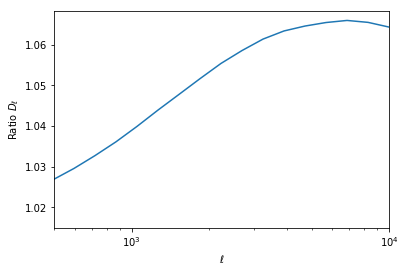

In [7]:
pl.semilogx(v4[:,0], D4/D2)
pl.xlim(500,10000)
pl.xlabel(r'$\ell$')
pl.ylabel(r'Ratio $D_\ell$')

In [4]:
files200m = ['../data/cl_yy_virial_z0p007_mf_200m.dat', '../data/cl_yy_virial_mf_200m.dat', '../data/cl_yy_m200c_mf_200m.dat']
labels = ['Virial z>0.007', 'Virial z>0.07', 'M200c']
files400m = ['../data/cl_yy_virial_z0p007_mf_400m.dat', '../data/cl_yy_virial_mf_400m.dat', '../data/cl_yy_m200c_mf_400m.dat']
labels = ['Virial z>0.007', 'Virial z>0.07', 'M200c']

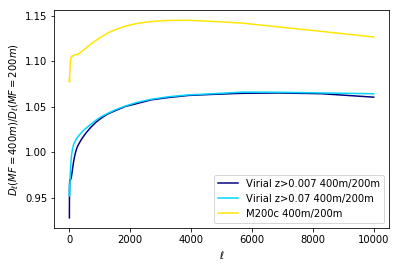

In [10]:
labels = ['Virial z>0.007 400m/200m', 'Virial z>0.07 400m/200m', 'M200c 400m/200m']
colors = pl.cm.jet(np.linspace(0, 1, len(files200m) + 1))
i = 0
for f2, f4 in zip(files200m, files400m):
    f = np.genfromtxt(f2)
    ellarr = f[:,0]
    cl200m = f[:,3] * 1e12 * ellarr * (ellarr+1) / 2. / np.pi
    f = np.genfromtxt(f4)
    ellarr = f[:,0]
    cl400m = f[:,3] * 1e12 * ellarr * (ellarr+1) / 2. / np.pi
    pl.plot(ellarr, cl400m/cl200m, label=labels[i], c=colors[i])
    i += 1
#pl.ylim([1.01, 1.07])
pl.xlabel(r'$\ell$')
pl.ylabel(r'$D_\ell(MF=400m)/D_\ell(MF=200m)$')
pl.legend(loc=0)

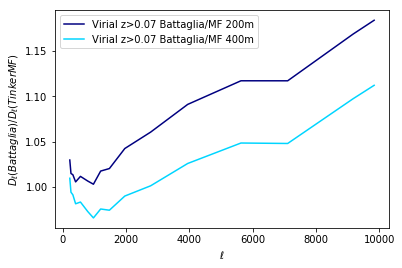

In [20]:
b = np.genfromtxt('/media/luna1/vinu/github/HaloModel/data/battaglia_analytical.csv', delimiter=',')
ellb = b[:,0]
Db = b[:,1]
v2 = np.genfromtxt('/media/luna1/vinu/github/HaloModel/data/cl_yy_virial_mf_200m.dat')
D2 =  v2[:,0]*(1.+v2[:,0])*v2[:,1]*1e12*6.7354/2./np.pi
v4 = np.genfromtxt('/media/luna1/vinu/github/HaloModel/data/cl_yy_virial_mf_400m.dat')
D4 =  v4[:,0]*(1.+v4[:,0])*v4[:,1]*1e12*6.7354/2./np.pi

labels = ['Virial z>0.07 Battaglia/MF 200m', 'Virial z>0.07 Battaglia/MF 400m']
colors = pl.cm.jet(np.linspace(0, 1, len(files200m) + 1))

spl = interpolate.interp1d(v2[:,0], D2)
pl.plot(ellb, Db/spl(ellb), label=labels[0], c=colors[0])

spl = interpolate.interp1d(v4[:,0], D4)
pl.plot(ellb, Db/spl(ellb), label=labels[1], c=colors[1])

#pl.ylim([1.01, 1.07])
pl.xlabel(r'$\ell$')
pl.ylabel(r'$D_\ell(Battaglia)/D_\ell(Tinker MF)$')
pl.legend(loc=0)

# Compare old and new shape catalogs

(0, 20)

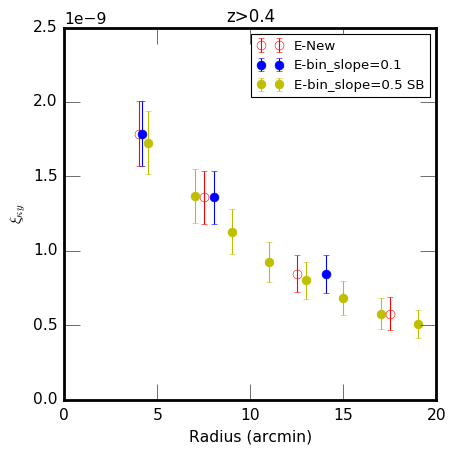

In [19]:
mytools.matrc_small()
ifile = np.load('../data/kappa_y_y1_im3shape_milca_0_0.40.npz') #Older convergence map using im3shape
theta_arcmin = ifile['theta_arcmin']
ey = ifile['ey']
ey_cov = ifile['ey_cov']
by = ifile['by']
by_cov = ifile['by_cov']


#pl.errorbar(theta_arcmin, ey, np.sqrt(np.diagonal(ey_cov)), c='g', marker='o', ms=8, label='E-Old', ls='')
#pl.errorbar(theta_arcmin, by, np.sqrt(np.diagonal(by_cov)), c='g', marker='x', ms=8, label='B-Old', ls='')

ifile = np.load('../data/kappa_y_y1_mcal_milca_0_11.00.npz') #New convergence map using mcal with z>0.4 
theta_arcmin = ifile['theta_arcmin']
ey = ifile['ey']
ey_cov = ifile['ey_cov']
by = ifile['by']
by_cov = ifile['by_cov']

ifile = np.load('../data/kappa_y_y1_mcal_milca_0_11.00_bs0p1.npz') #New convergence map using mcal with z>0.4 
eybs0p1 = ifile['ey']
eybs0p1_err = np.sqrt(np.diagonal(ifile['ey_cov']))

ifile = np.load('../data/kappa_y_y1_mcal_milca_0_11.00_bs0p5.npz') #New convergence map using mcal with z>0.4 
eybs0p5 = ifile['ey']
eybs0p5_err = np.sqrt(np.diagonal(ifile['ey_cov']))

ifile = np.load('../data/kappa_y_y1_mcal_milca_0_11.00_bs0p5_sb.npz') #New convergence map using mcal with z>0.4 
theta_arcmin_sb = ifile['theta_arcmin']
eybs0p5_sb = ifile['ey']
eybs0p5_sb_err = np.sqrt(np.diagonal(ifile['ey_cov']))

pl.errorbar(theta_arcmin, ey, np.sqrt(np.diagonal(ey_cov)), c='r', mfc='none', mec='r', marker='o', ms=8, label='E-New', ls='')
#pl.errorbar(theta_arcmin, by, np.sqrt(np.diagonal(by_cov)), c='r', mfc=None, marker='x', ms=8, label='B-New', ls='')
pl.errorbar(theta_arcmin*(1+0.01*theta_arcmin), eybs0p1, eybs0p1_err, c='b', mfc='b', mec='b', marker='o', ms=8, label='E-bin_slope=0.1', ls='')
#pl.errorbar(theta_arcmin, eybs0p5, eybs0p5_err, c='c', mfc='c', mec='c', marker='o', ms=8, label='E-bin_slope=0.5', ls='')
pl.errorbar(theta_arcmin_sb, eybs0p5_sb, eybs0p5_sb_err, c='y', mfc='y', mec='y', marker='o', ms=8, label='E-bin_slope=0.5 SB', ls='')

pl.legend(loc=0)
pl.xlabel('Radius (arcmin)')
pl.ylabel(r'$\xi_{\kappa y}$')
pl.title('z>0.4')
#pl.ylim([1e-11, 3e-10])
pl.xlim([0, 20])

# Compare model and data

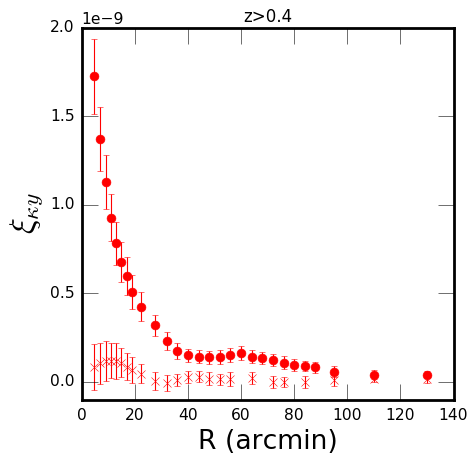

In [41]:
mytools.matrc_small()
ifile = np.load('../data/kappa_y_y1_mcal_milca_0_11.00_bs1p0_sb.npz') #New convergence map using mcal with z>0.4 
theta_arcmin = ifile['theta_arcmin']
ey = ifile['ey']
ey_err = np.sqrt(np.diagonal(ifile['ey_cov']))
by = ifile['by']
by_err = np.sqrt(np.diagonal(ifile['by_cov']))


pl.errorbar(theta_arcmin, ey, ey_err, c='r', mfc='r', mec='r', marker='o', ms=8, label='', ls='')
pl.errorbar(theta_arcmin, by, by_err, c='r', mfc=None, marker='x', ms=8, label='', ls='')

r_arcmin, cl1h, cl2h, cl = np.genfromtxt('../data/xi_ky_z0p4.dat', unpack=True)
#pl.plot(r_arcmin, cl, c='k', label='Halo model')
#pl.plot(r_arcmin, cl1h, c='g', label='1-halo')
#pl.plot(r_arcmin, cl2h, c='b', label='2-halo')
pl.ylim([-1e-10, 2e-9])
pl.xlabel('Radius (arcmin)')
pl.ylabel(r'$\xi_{\kappa y}$')
pl.title('z>0.4')
pl.legend(loc=0)
pl.ylabel(r'$\xi_{\kappa y}$', fontsize=30)
pl.xlabel('R (arcmin)', fontsize=24)
pl.savefig('../figs/correlation_milca_halo_z0p4.pdf', bbox_inches='tight')


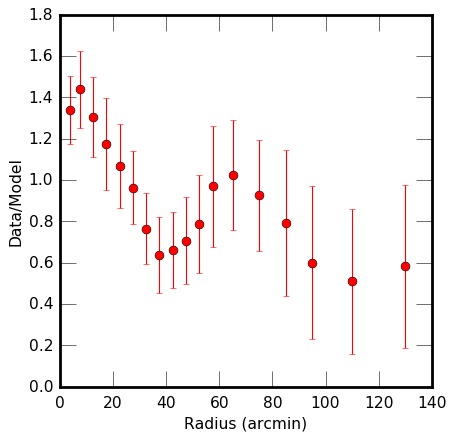

In [5]:
clspl = interp1d(r_arcmin, cl)
pl.errorbar(theta_arcmin, ey/clspl(theta_arcmin), ey_err/clspl(theta_arcmin), c='r',marker='o', ms=8, label='E', ls='')
pl.xlabel('Radius (arcmin)')
pl.ylabel('Data/Model')

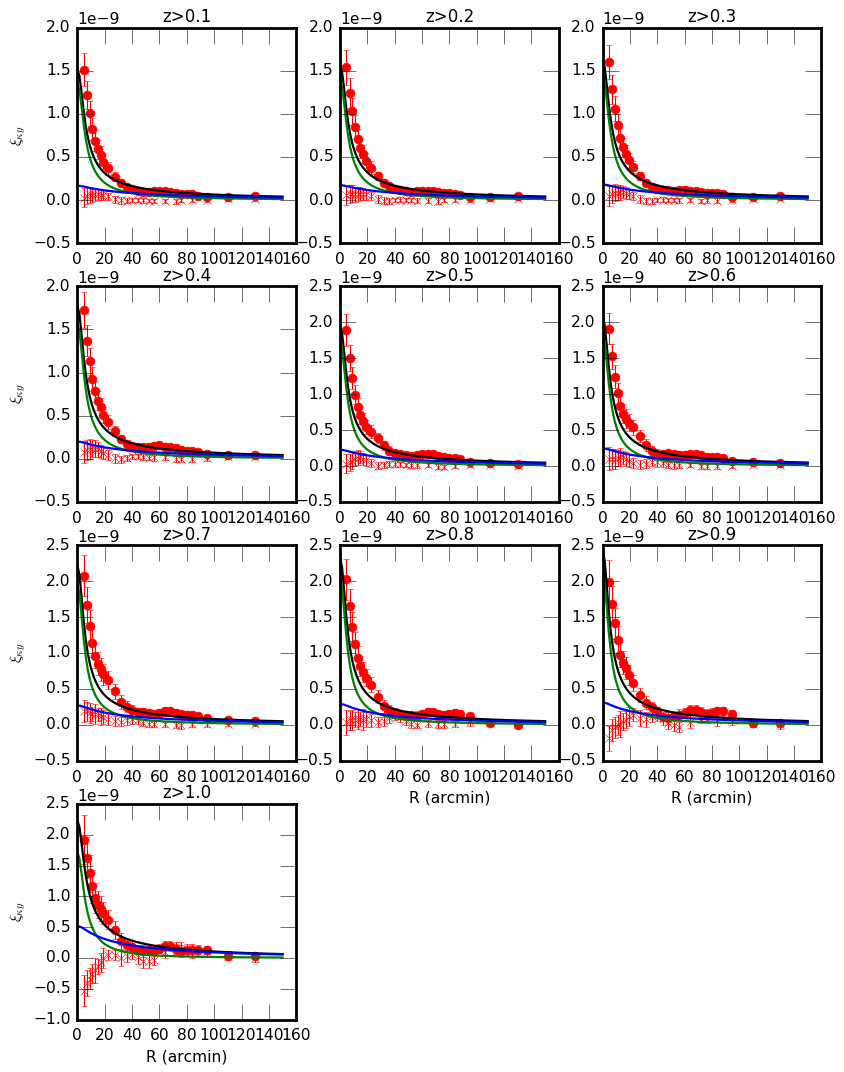

In [18]:
pl.rcParams.update({'figure.figsize' : [12.0, 16.0]})
j = 1
for s, i in zip(['0p1', '0p2','0p3','0p4','0p5','0p6','0p7','0p8','0p9','1p0'], np.arange(8, 18)):
    pl.subplot(4,3,j)
    ifile = np.load('../data/kappa_y_y1_mcal_milca_0_%.2f_bs1p0_sb.npz'%i) #New convergence map using mcal 
    theta_arcmin = ifile['theta_arcmin']
    ey = ifile['ey']
    ey_err = np.sqrt(np.diagonal(ifile['ey_cov']))
    by = ifile['by']
    by_err = np.sqrt(np.diagonal(ifile['by_cov']))

    pl.errorbar(theta_arcmin, ey, ey_err, c='r', mfc='r', mec='r', marker='o', ms=8, label='E', ls='')
    pl.errorbar(theta_arcmin, by, by_err, c='r', mfc=None, marker='x', ms=8, label='B', ls='')

    r_arcmin, cl1h, cl2h, cl = np.genfromtxt('../data/xi_ky_z%s.dat'%s, unpack=True)
    pl.plot(r_arcmin, cl, c='k', lw=2)
    pl.plot(r_arcmin, cl1h, c='g', lw=2)
    pl.plot(r_arcmin, cl2h, c='b', lw=2)
    pl.title('z>%s'%s.replace('p', '.'))
    #pl.ylim([1e-11, 3e-10])
    #pl.xlim([40,90])
    if j in [1, 4, 7, 10]:
        pl.ylabel(r'$\xi_{\kappa y}$')
    if j>=8:
        pl.xlabel('R (arcmin)')
    j+=1


<IPython.core.display.Javascript object>


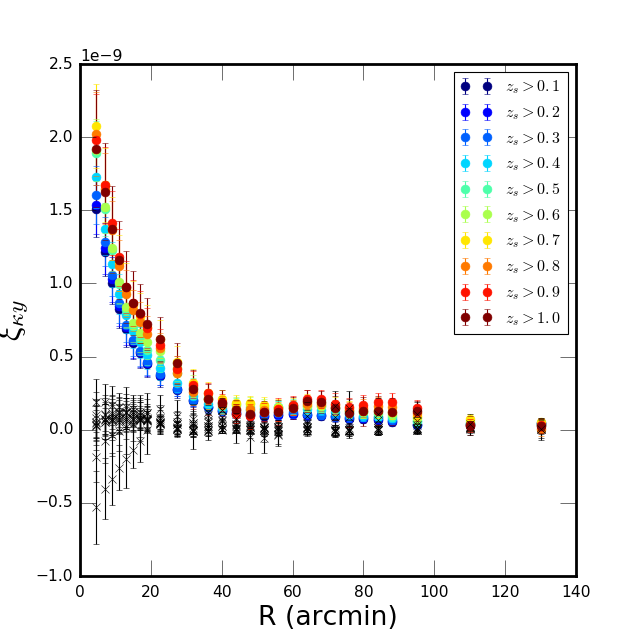

In [60]:
pl.rcParams.update({'figure.figsize' : [8.0, 8.0]})
colors = pl.cm.jet(np.linspace(0, 1, 10))
j = 0
for s, i in zip(['0p1', '0p2','0p3','0p4','0p5','0p6','0p7','0p8','0p9','1p0'], np.arange(8, 18)):
    ifile = np.load('../data/kappa_y_y1_mcal_milca_0_%.2f_bs1p0_sb.npz'%i) #New convergence map using mcal 
    theta_arcmin = ifile['theta_arcmin']
    ey = ifile['ey']
    ey_err = np.sqrt(np.diagonal(ifile['ey_cov']))
    by = ifile['by']
    by_err = np.sqrt(np.diagonal(ifile['by_cov']))

    pl.errorbar(theta_arcmin, ey, ey_err, c=colors[j], mec=colors[j], marker='o', ms=8, label=r'$z_s > %s$'%(s.replace('p', '.')), ls='')
    pl.errorbar(theta_arcmin, by, by_err, c='k', mfc=None, marker='x', ms=8, ls='')

    r_arcmin, cl1h, cl2h, cl = np.genfromtxt('../data/xi_ky_z%s.dat'%s, unpack=True)
    #pl.plot(r_arcmin, cl, c='k', lw=2)
    #pl.plot(r_arcmin, cl1h, c='g', lw=2)
    #pl.plot(r_arcmin, cl2h, c='b', lw=2)
    #pl.title('z>%s'%s.replace('p', '.'))
    #pl.ylim([1e-11, 3e-10])
    #pl.xlim([40,90])
    j+=1
pl.legend(loc=0)
pl.ylabel(r'$\xi_{\kappa y}$', fontsize=30)
pl.xlabel('R (arcmin)', fontsize=24)
pl.savefig('../figs/correlation_milca.pdf', bbox_inches='tight')


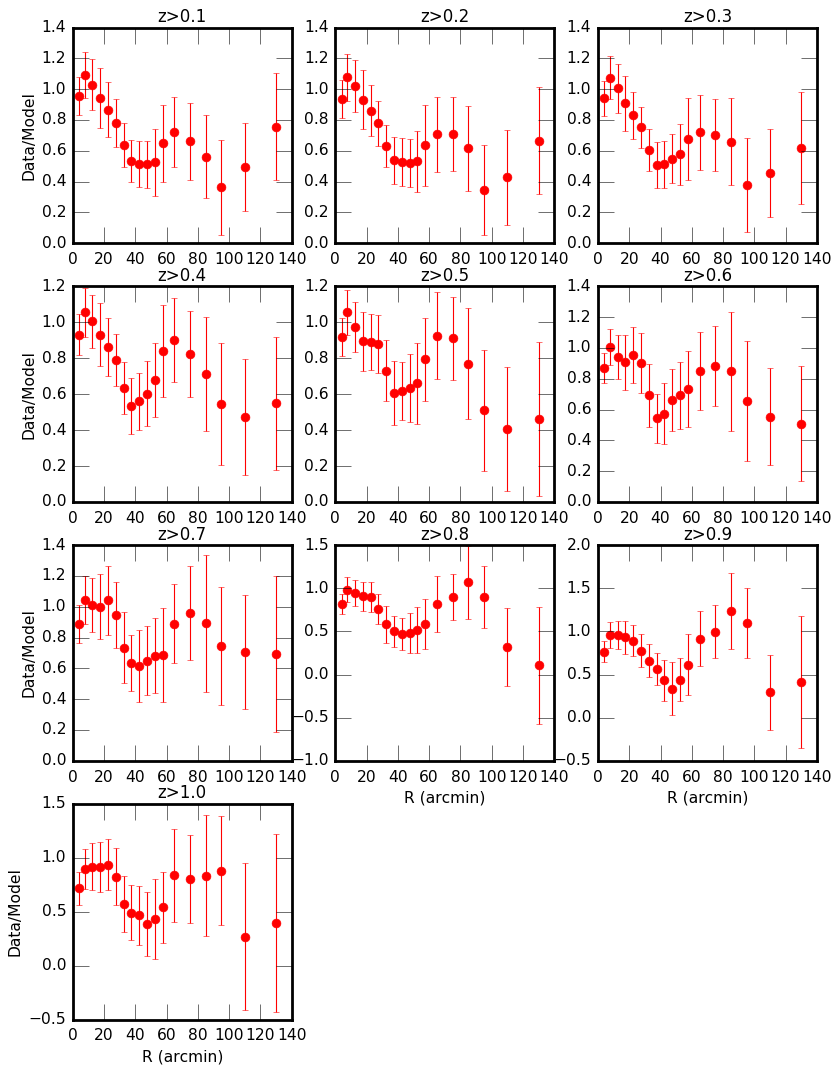

In [23]:
pl.rcParams.update({'figure.figsize' : [12.0, 16.0]})
j = 1
for s, i in zip(['0p1', '0p2','0p3','0p4','0p5','0p6','0p7','0p8','0p9','1p0'], np.arange(8, 18)):
    pl.subplot(4,3,j)
    ifile = np.load('../data/kappa_y_y1_mcal_milca_0_%.2f.npz'%i) #New convergence map using mcal 
    theta_arcmin = ifile['theta_arcmin']
    ey = ifile['ey']
    ey_err = np.sqrt(np.diagonal(ifile['ey_cov']))
    by = ifile['by']
    by_err = np.sqrt(np.diagonal(ifile['by_cov']))
   
    r_arcmin, cl1h, cl2h, cl = np.genfromtxt('../data/xi_ky_z%s.dat'%s, unpack=True)
    splcl = interp1d(r_arcmin, cl)
    pl.errorbar(theta_arcmin, ey/splcl(theta_arcmin), ey_err/splcl(theta_arcmin), c='r', mfc='r', mec='r', marker='o', ms=8, label='E', ls='')
    pl.title('z>%s'%s.replace('p', '.'))
    if j in [1, 4, 7, 10]:
        pl.ylabel('Data/Model')
    if j>=8:
        pl.xlabel('R (arcmin)')
    j+=1

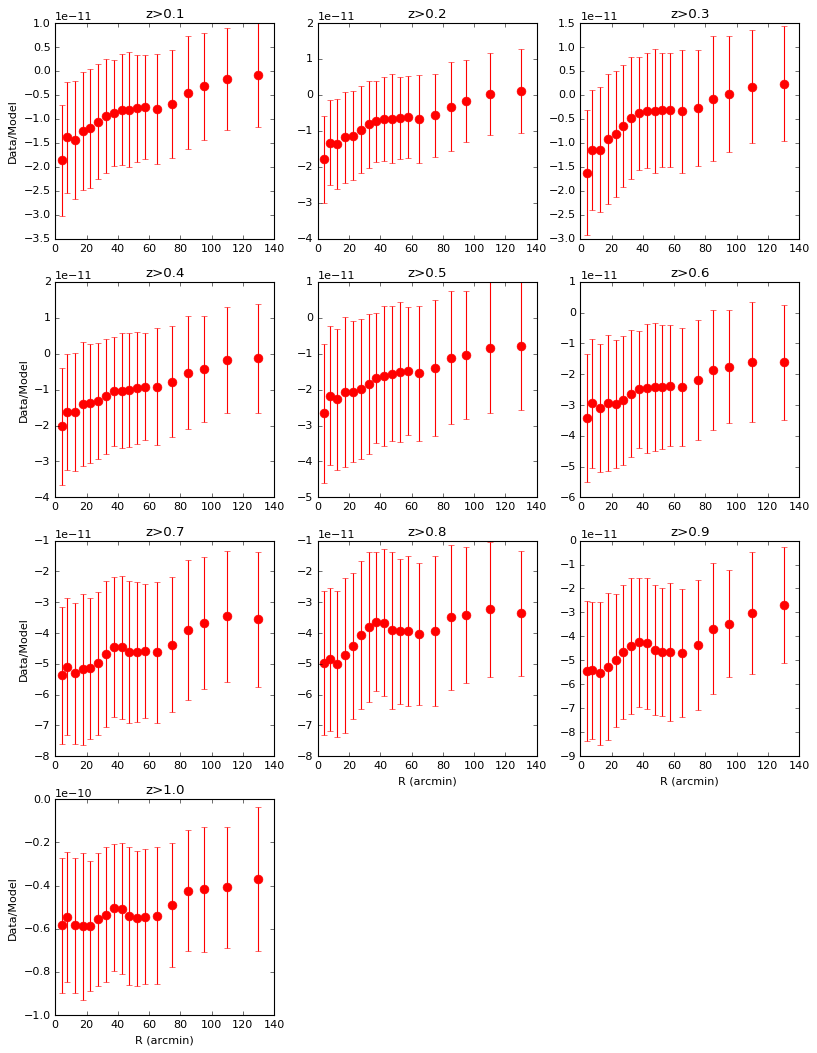

In [3]:
alpha_cib = 1.22e-7
pl.rcParams.update({'figure.figsize' : [12.0, 16.0]})
j = 1
for s, i in zip(['0p1', '0p2','0p3','0p4','0p5','0p6','0p7','0p8','0p9','1p0'], np.arange(8, 18)):
    pl.subplot(4,3,j)
    ifile = np.load('../data/kappa_857_y1_mcal_%.2f.npz'%i) #New convergence map using mcal 
    theta_arcmin = ifile['theta_arcmin']
    sys_m = ifile['ey']
    sys_m_err = np.sqrt(np.diagonal(ifile['ey_cov']))
    sys_n = ifile['by']
    sys_n_err = np.sqrt(np.diagonal(ifile['by_cov']))

    pl.errorbar(theta_arcmin, alpha_cib*sys_m, alpha_cib*sys_m_err, c='r', mfc='r', mec='r', marker='o', ms=8, label='Sys', ls='')

    pl.title('z>%s'%s.replace('p', '.'))
    if j in [1, 4, 7, 10]:
        pl.ylabel('Data/Model')
    if j>=8:
        pl.xlabel('R (arcmin)')
    j+=1

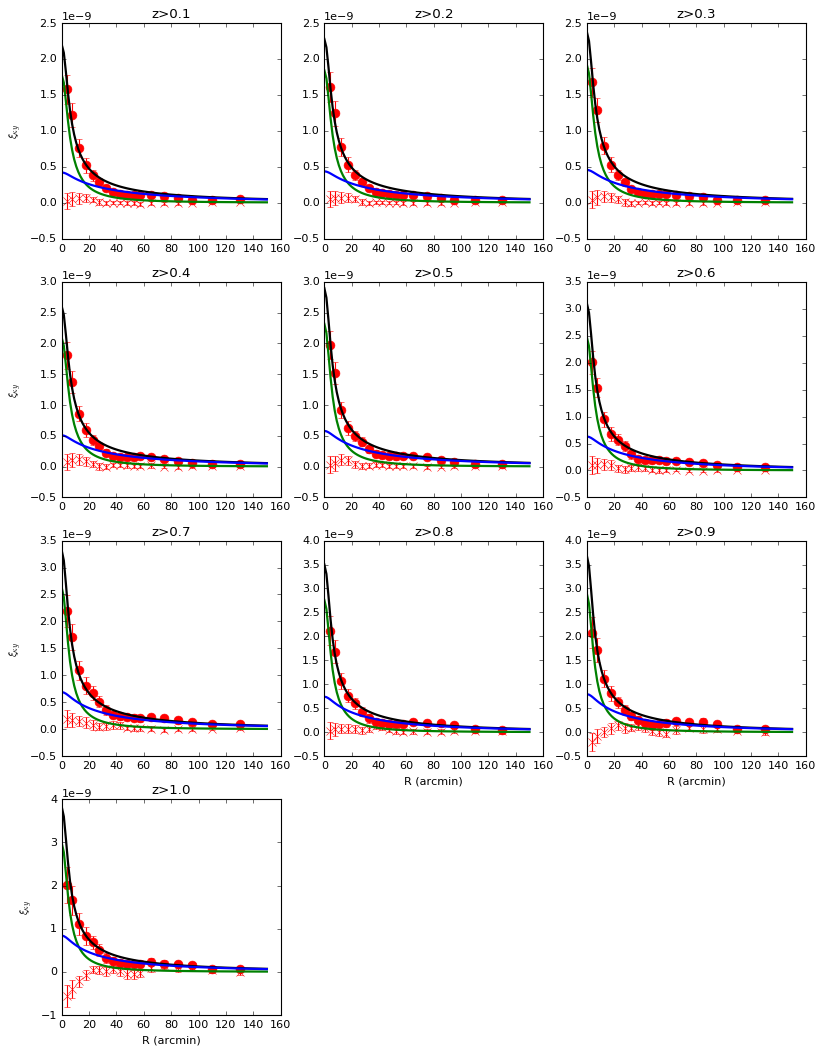

In [11]:
alpha_cib = 1.22e-7
pl.rcParams.update({'figure.figsize' : [12.0, 16.0]})
j = 1
for s, i in zip(['0p1', '0p2','0p3','0p4','0p5','0p6','0p7','0p8','0p9','1p0'], np.arange(8, 18)):
    pl.subplot(4,3,j)
    ifile = np.load('../data/kappa_y_y1_mcal_milca_0_%.2f.npz'%i) #New convergence map using mcal 
    theta_arcmin = ifile['theta_arcmin']
    ey = ifile['ey']
    ey_err = np.sqrt(np.diagonal(ifile['ey_cov']))
    by = ifile['by']
    by_err = np.sqrt(np.diagonal(ifile['by_cov']))

    #Systematic signal
    ifile = np.load('../data/kappa_857_y1_mcal_%.2f.npz'%i) #New convergence map using mcal 
    theta_arcmin = ifile['theta_arcmin']
    sys_m = ifile['ey']
    sys_m_err = np.sqrt(np.diagonal(ifile['ey_cov']))
    sys_n = ifile['by']
    sys_n_err = np.sqrt(np.diagonal(ifile['by_cov']))

    
    pl.errorbar(theta_arcmin, ey-alpha_cib*sys_m, ey_err, c='r', mfc='r', mec='r', marker='o', ms=8, label='E', ls='')
    pl.errorbar(theta_arcmin, by, by_err, c='r', mfc=None, marker='x', ms=8, label='B', ls='')

    #Models
    r_arcmin, cl1h, cl2h, cl = np.genfromtxt('../data/xi_ky_z%s.dat'%s, unpack=True)
    pl.plot(r_arcmin, cl, c='k', lw=2)
    pl.plot(r_arcmin, cl1h, c='g', lw=2)
    pl.plot(r_arcmin, cl2h, c='b', lw=2)
    
    pl.title('z>%s'%s.replace('p', '.'))
    if j in [1, 4, 7, 10]:
        pl.ylabel(r'$\xi_{\kappa y}$')
    if j>=8:
        pl.xlabel('R (arcmin)')
    j+=1

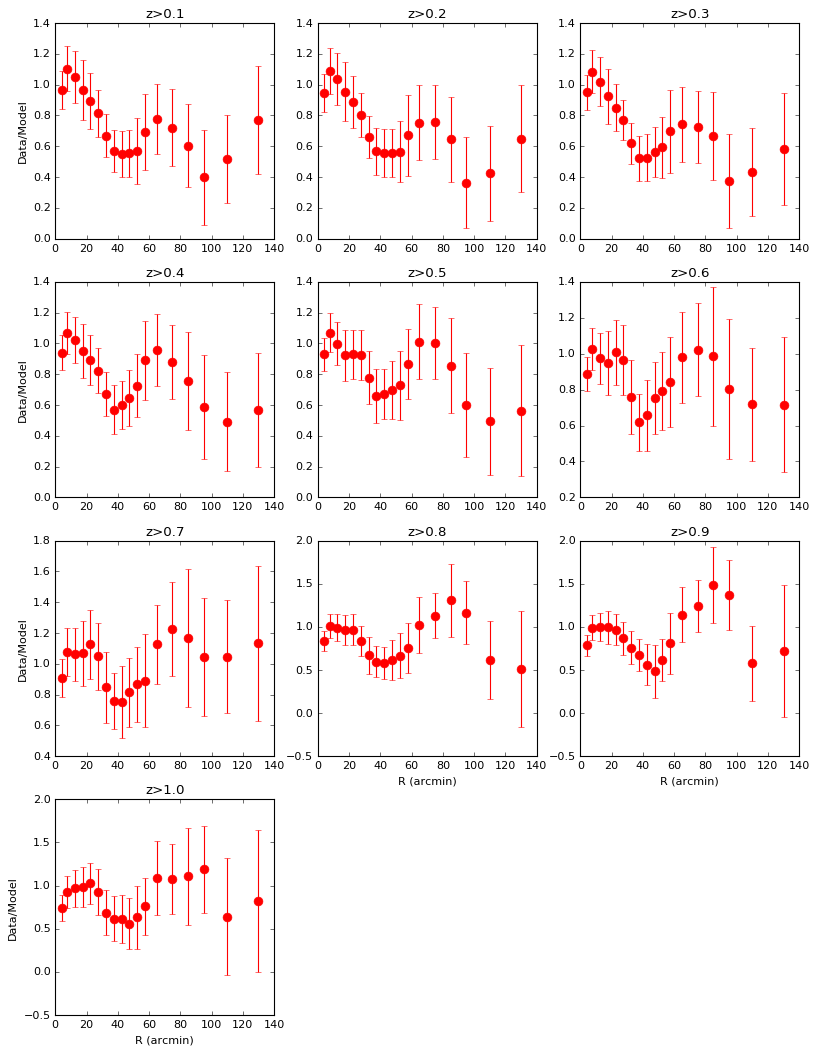

In [12]:
alpha_cib = 1.22e-7
pl.rcParams.update({'figure.figsize' : [12.0, 16.0]})
j = 1
for s, i in zip(['0p1', '0p2','0p3','0p4','0p5','0p6','0p7','0p8','0p9','1p0'], np.arange(8, 18)):
    pl.subplot(4,3,j)
    ifile = np.load('../data/kappa_y_y1_mcal_milca_0_%.2f.npz'%i) #New convergence map using mcal 
    theta_arcmin = ifile['theta_arcmin']
    ey = ifile['ey']
    ey_err = np.sqrt(np.diagonal(ifile['ey_cov']))
    by = ifile['by']
    by_err = np.sqrt(np.diagonal(ifile['by_cov']))

    #Systematic signal
    ifile = np.load('../data/kappa_857_y1_mcal_%.2f.npz'%i) #New convergence map using mcal 
    theta_arcmin = ifile['theta_arcmin']
    sys_m = ifile['ey']
    sys_m_err = np.sqrt(np.diagonal(ifile['ey_cov']))
    sys_n = ifile['by']
    sys_n_err = np.sqrt(np.diagonal(ifile['by_cov']))

    #Models
    r_arcmin, cl1h, cl2h, cl = np.genfromtxt('../data/xi_ky_z%s.dat'%s, unpack=True)
    splcl = interp1d(r_arcmin, cl)
    
    pl.errorbar(theta_arcmin, (ey-alpha_cib*sys_m)/splcl(theta_arcmin), ey_err/splcl(theta_arcmin), c='r', mfc='r', mec='r', marker='o', ms=8, label='E', ls='')
   
    pl.title('z>%s'%s.replace('p', '.'))
    if j in [1, 4, 7, 10]:
        pl.ylabel('Data/Model')
    if j>=8:
        pl.xlabel('R (arcmin)')
    j+=1

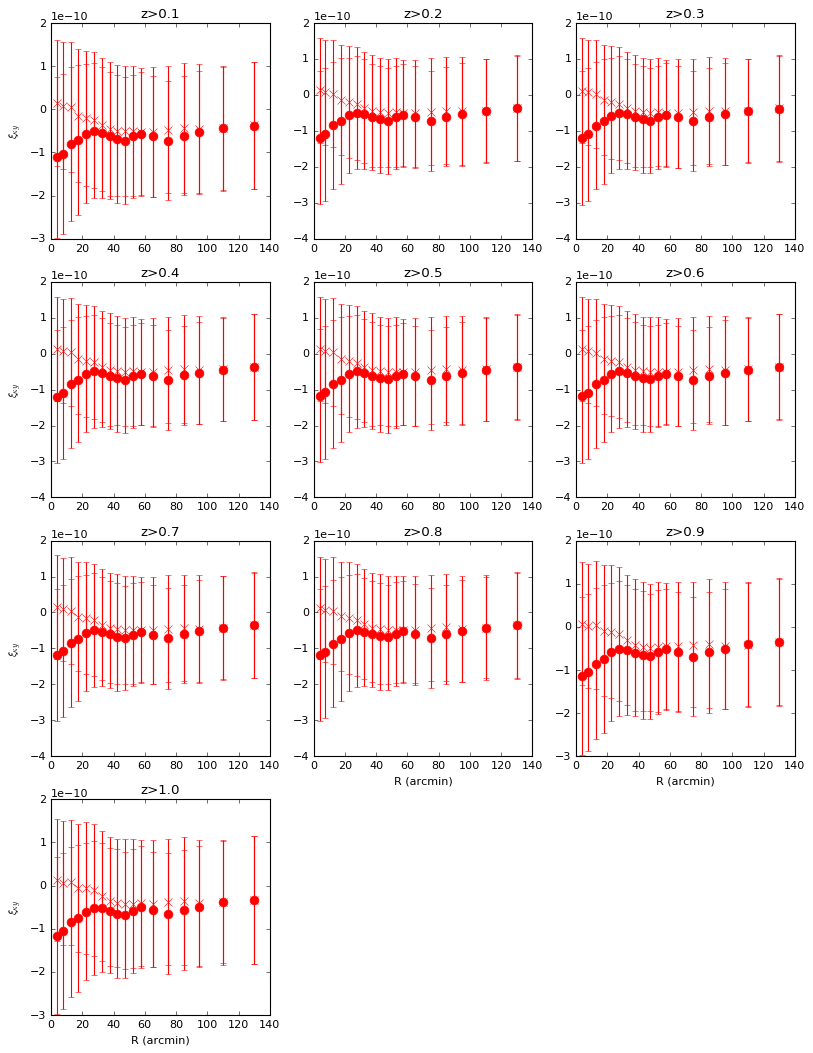

In [6]:
pl.rcParams.update({'figure.figsize' : [12.0, 16.0]})
j = 1
ey1 = 0
for s, i in zip(['0p1', '0p2','0p3','0p4','0p5','0p6','0p7','0p8','0p9','1p0'], np.arange(8, 18)):
    pl.subplot(4,3,j)
    ifile = np.load('../data/kappa_y_y1_PSF_mcal_milca_0_%.2f.npz'%i) #New convergence map using mcal 
    theta_arcmin = ifile['theta_arcmin']
    ey = ifile['ey']
    ey_err = np.sqrt(np.diagonal(ifile['ey_cov']))
    by = ifile['by']
    by_err = np.sqrt(np.diagonal(ifile['by_cov']))
    
    #pl.plot(theta_arcmin, ey-ey1)
    #ey1 = ifile['ey']
    pl.errorbar(theta_arcmin, ey, ey_err, c='r', mfc='r', mec='r', marker='o', ms=8, label='E', ls='')
    pl.errorbar(theta_arcmin, by, by_err, c='r', mfc=None, marker='x', ms=8, label='B', ls='')

    pl.title('z>%s'%s.replace('p', '.'))
    if j in [1, 4, 7, 10]:
        pl.ylabel(r'$\xi_{\kappa y}$')
    if j>=8:
        pl.xlabel('R (arcmin)')
    j+=1

# Constant bias model

CFHTLens 9.36
DES 19.30


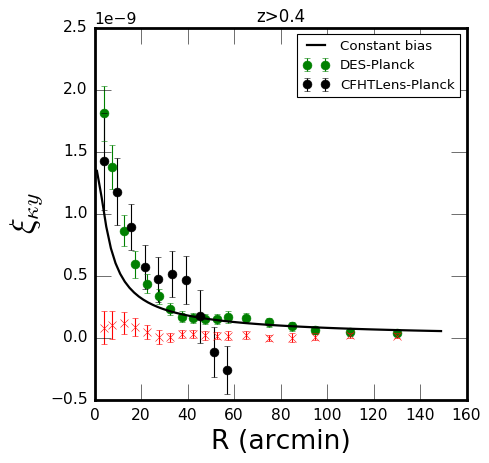

In [51]:
alpha_cib = 1.22e-7
pl.rcParams.update({'figure.figsize' : [6.0, 6.0]})

ifile = np.load('../data/kappa_y_y1_mcal_milca_0_11.00.npz') #New convergence map using mcal 
theta_arcmin = ifile['theta_arcmin']
ey = ifile['ey']
ey_err = np.sqrt(np.diagonal(ifile['ey_cov']))
by = ifile['by']
by_err = np.sqrt(np.diagonal(ifile['by_cov']))

#Systematic signal
ifile = np.load('../data/kappa_857_y1_mcal_11.00.npz'%i) #New convergence map using mcal 
theta_arcmin = ifile['theta_arcmin']
sys_m = ifile['ey']
sys_m_err = np.sqrt(np.diagonal(ifile['ey_cov']))
sys_n = ifile['by']
sys_n_err = np.sqrt(np.diagonal(ifile['by_cov']))

    
pl.errorbar(theta_arcmin, ey-alpha_cib*sys_m, ey_err, c='g', mfc='g', mec='g', marker='o', ms=8, label='DES-Planck', ls='')
pl.errorbar(theta_arcmin, by, by_err, c='r', mfc=None, marker='x', ms=8, label='', ls='')

#Models
r_arcmin, xi, xism = np.genfromtxt('../data/ky_xi_const_bias_kl1_z0p4.dat', unpack=True)
rw, xiw = np.genfromtxt('../data/waerbeke.dat', unpack=True)
rw, xiw, xie = np.genfromtxt('../data/waerbeke_BD_data.dat', unpack=True)
print 'CFHTLens %.2f'%(np.sqrt(np.sum(xiw**2/xie**2)))
print 'DES %.2f'%(np.sqrt(np.sum(ey**2/ey_err**2)))
pl.plot(r_arcmin, xism, c='k', lw=2, label='Constant bias')
pl.errorbar(rw, xiw, xie, c='k', mec='k', marker='o', ms=8, label='CFHTLens-Planck', ls='')
#pl.plot(rw, xiw, c='g', lw=2, label='Waerbeke')
pl.title('z>0.4')
pl.ylabel(r'$\xi_{\kappa y}$', fontsize=30)
pl.xlabel('R (arcmin)', fontsize=24)
pl.legend(loc=0)
pl.savefig('../figs/correlation_milca_const_z0p4.pdf', bbox_inches='tight')


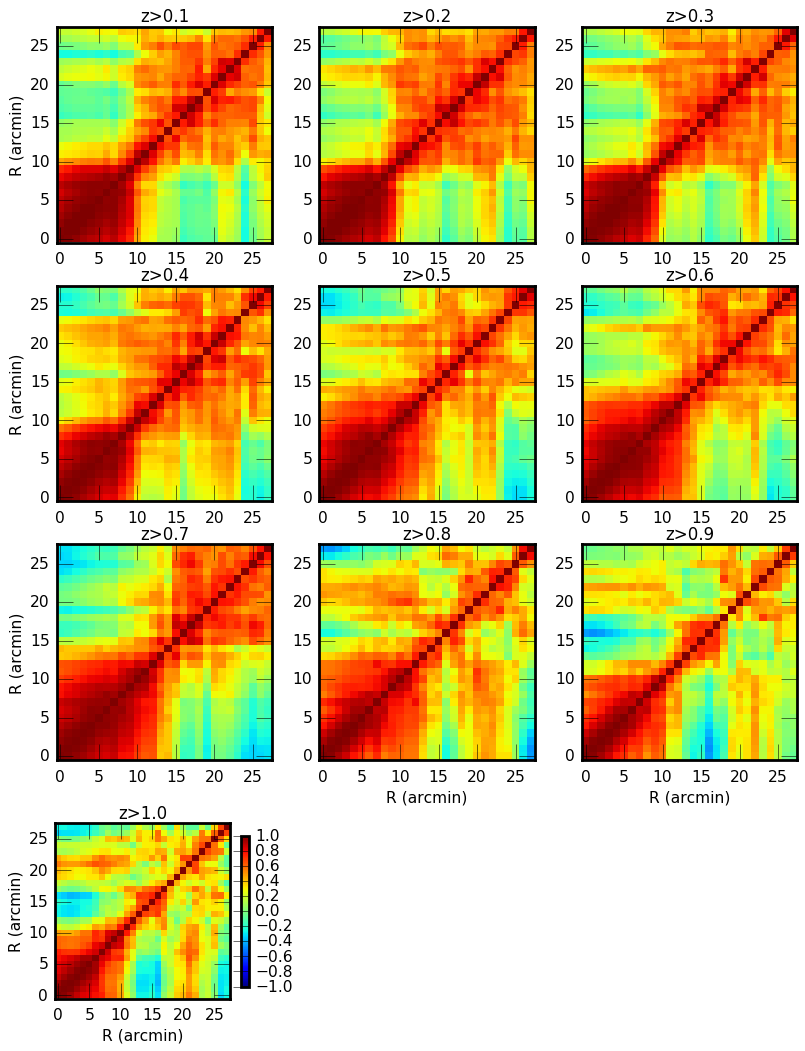

In [30]:
pl.rcParams.update({'figure.figsize' : [12.0, 16.0]})
j = 1
for s, i in zip(['0p1', '0p2','0p3','0p4','0p5','0p6','0p7','0p8','0p9','1p0'], np.arange(8, 18)):
    pl.subplot(4,3,j)
    ifile = np.load('../data/kappa_y_y1_mcal_milca_0_%.2f_bs1p0_sb.npz'%i) #New convergence map using mcal 
    theta_arcmin = ifile['theta_arcmin']
    ey_corr = ifile['ey_corr']
    by = ifile['by']
    
    pl.imshow(ey_corr, interpolation='none', origin='lower', vmax=1, vmin=-1)

    pl.title('z>%s'%s.replace('p', '.'))

    if j in [1, 4, 7, 10]:
        pl.ylabel('R (arcmin)')
    if j>=8:
        pl.xlabel('R (arcmin)')
    if j == 10:
        pl.colorbar(shrink=0.7)
    j+=1

    

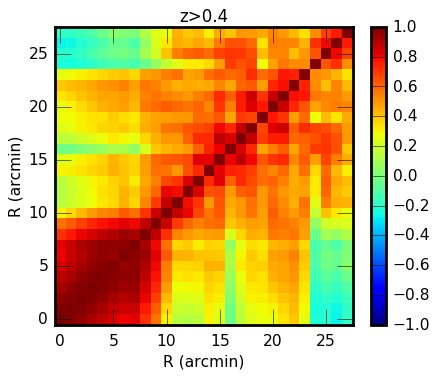

In [56]:
ifile = np.load('../data/kappa_y_y1_mcal_milca_0_11.00_bs1p0_sb.npz'%i) #New convergence map using mcal 
theta_arcmin = ifile['theta_arcmin']
ey_corr = ifile['ey_corr']
pl.imshow(ey_corr, interpolation='none', origin='lower', vmax=1, vmin=-1)
pl.title('z>0.4')
pl.ylabel('R (arcmin)')
pl.xlabel('R (arcmin)')
pl.colorbar(shrink=0.8)
pl.savefig('../figs/correlation_matrix_zs04.png', bbox_inches='tight')

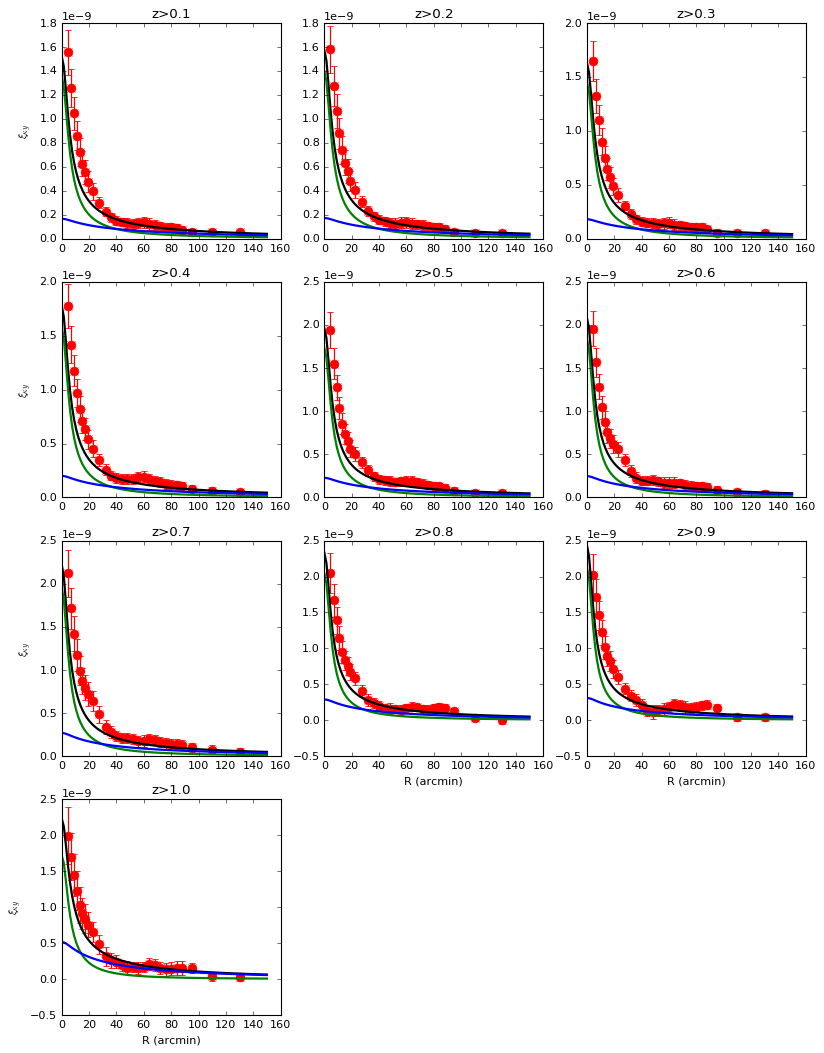

In [4]:
pl.rcParams.update({'figure.figsize' : [12.0, 16.0]})
j = 1
for s, i in zip(['0p1', '0p2','0p3','0p4','0p5','0p6','0p7','0p8','0p9','1p0'], np.arange(8, 18)):
    pl.subplot(4,3,j)
    ifile = np.load('../data/kappa_y_y1_mcal_nilc_0_%.2f_bs1p0_sb.npz'%i) #New convergence map using mcal 
    theta_arcmin = ifile['theta_arcmin']
    ey = ifile['ey']
    ey_err = np.sqrt(np.diagonal(ifile['ey_cov']))
    by = ifile['by']
    by_err = np.sqrt(np.diagonal(ifile['by_cov']))

    pl.errorbar(theta_arcmin, ey, ey_err, c='r', mfc='r', mec='r', marker='o', ms=8, label='E', ls='')
    pl.errorbar(theta_arcmin, by, by_err, c='r', mfc=None, marker='x', ms=8, label='B', ls='')

    r_arcmin, cl1h, cl2h, cl = np.genfromtxt('../data/xi_ky_z%s.dat'%s, unpack=True)
    pl.plot(r_arcmin, cl, c='k', lw=2)
    pl.plot(r_arcmin, cl1h, c='g', lw=2)
    pl.plot(r_arcmin, cl2h, c='b', lw=2)
    pl.title('z>%s'%s.replace('p', '.'))
    #pl.ylim([1e-11, 3e-10])
    #pl.xlim([40,90])
    if j in [1, 4, 7, 10]:
        pl.ylabel(r'$\xi_{\kappa y}$')
    if j>=8:
        pl.xlabel('R (arcmin)')
    j+=1